# Generacion del modelo

En este notebook, abordamos el desafío de identificar créditos y préstamos de consumo con alto riesgo de impago. Utilizando datos de financiaciones pasadas y su historial de pagos, nuestro objetivo es construir un modelo predictivo que pueda discernir el riesgo de impago de los solicitantes de préstamos y créditos de consumo.

In [1]:
import os 

In [2]:
cd C:\Users\GermanBo\Desktop\Kschool\Competition_Kg

c:\Users\GermanBo\Desktop\Kschool\Competition_Kg


C:\Users\GermanBo\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
os.listdir()

['Descripccin Variables.xlsx',
 'df_kagle.csv',
 'df_kagle_test.csv',
 'final_gbosch.csv',
 'final_gbosch.xlsx',
 'Kaggle.ipynb',
 'Kaggle_2.ipynb',
 'Kaggle_3.ipynb',
 'kschool-master-data-science-streaming-oct-2023.zip',
 'Plantilla Competicion.ipynb',
 'Plantilla Competicion.Rmd',
 'Prueba_Submission.csv',
 'Test.csv',
 'Train.csv']

In [4]:
import pandas as pd
import numpy as np

In [5]:
df_train = pd.read_csv("Train.csv", encoding='latin1')
df_test = pd.read_csv("Test.csv", encoding='latin1')


### Analisis basico de los datos

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488077 entries, 0 to 488076
Data columns (total 51 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Id                            488077 non-null  object 
 1   target                        488077 non-null  int64  
 2   calificacion_mes00            488077 non-null  object 
 3   calificacion_mes01            488077 non-null  object 
 4   calificacion_mes02            488077 non-null  object 
 5   calificacion_mes03            488077 non-null  object 
 6   calificacion_mes04            488077 non-null  object 
 7   calificacion_mes05            488077 non-null  object 
 8   canal                         488077 non-null  object 
 9   cant_ent_deuda_consu_mes00    249281 non-null  float64
 10  cant_ent_deuda_consu_mes01    245515 non-null  float64
 11  cant_ent_deuda_consu_mes02    242502 non-null  float64
 12  cant_ent_deuda_consu_mes03    239424 non-nul

### Na y outlayer

In [7]:
x = df_train.isna().sum().sort_values()
x = pd.DataFrame(x)
x[x.iloc[:,0]>0]

,0
cant_prot_no_aclarados_soles,2461
monto_doc_morosos_soles,2461
risk_predictor_2,7771
edad,21298
tipo_sociedad,228486
situacion_contribuyente,228486
rubro_actividades,228651
codigo_rubro_actividad,228651
cant_ent_deuda_consu_mes00,238796
cant_ent_deuda_hipot_mes00,238796


In [8]:
col_na = x[x.iloc[:,0]>22298].index
col_na

Index(['tipo_sociedad', 'situacion_contribuyente', 'rubro_actividades',
       'codigo_rubro_actividad', 'cant_ent_deuda_consu_mes00',
       'cant_ent_deuda_hipot_mes00', 'cant_ent_deuda_hipot_mes01',
       'cant_ent_deuda_consu_mes01', 'cant_ent_deuda_hipot_mes02',
       'cant_ent_deuda_consu_mes02', 'cant_ent_deuda_consu_mes03',
       'cant_ent_deuda_hipot_mes03', 'cant_ent_deuda_consu_mes04',
       'cant_ent_deuda_hipot_mes04', 'cant_ent_deuda_hipot_mes05',
       'cant_ent_deuda_consu_mes05', 'deuda_dir_vig_consu_mes00',
       'deuda_dir_vig_consu_mes01', 'deuda_dir_vig_consu_mes02',
       'deuda_dir_vig_consu_mes03', 'deuda_dir_vig_consu_mes04',
       'deuda_dir_vig_consu_mes05'],
      dtype='object')

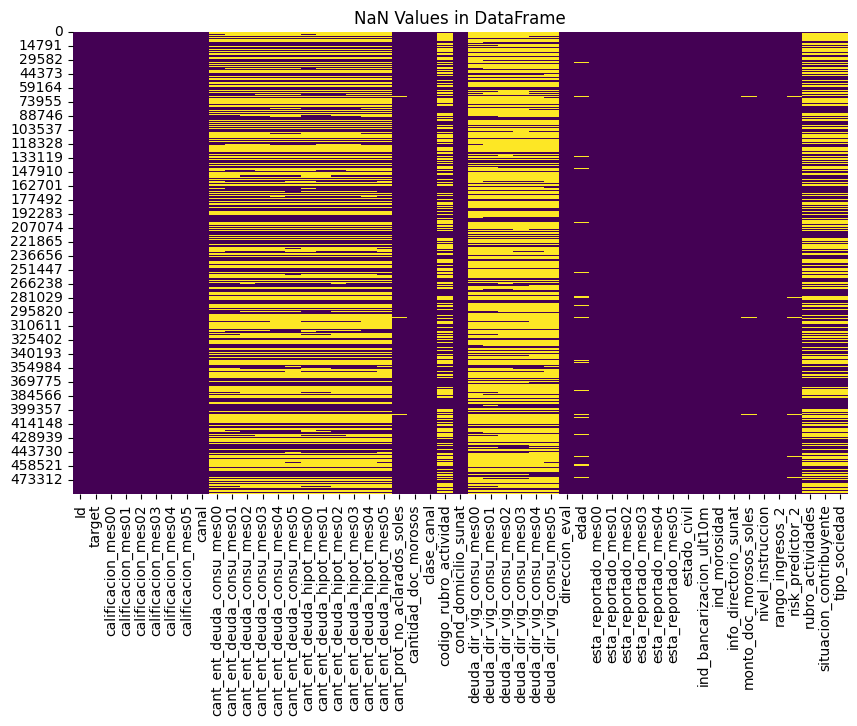

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado 'dt' con valores NaN
# Aquí visualizamos los valores NaN usando un mapa de calor

plt.figure(figsize=(10, 6))
sns.heatmap(df_train.isnull(), cmap='viridis', cbar=False)
plt.title('NaN Values in DataFrame')
plt.show()

Viendo que la mayoria de los Na se dan en unas determinadas columnas, vamos a eliminar esas columnas directamente, para posteriormente eliminar las filas con Na de las otras variables que presentan menos. El punto de corte lo vamos a tener con la variable "edad" 

In [10]:
df_1 = df_train.drop(col_na, axis=1)
df_1 = df_1.dropna()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464335 entries, 0 to 488076
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Id                            464335 non-null  object 
 1   target                        464335 non-null  int64  
 2   calificacion_mes00            464335 non-null  object 
 3   calificacion_mes01            464335 non-null  object 
 4   calificacion_mes02            464335 non-null  object 
 5   calificacion_mes03            464335 non-null  object 
 6   calificacion_mes04            464335 non-null  object 
 7   calificacion_mes05            464335 non-null  object 
 8   canal                         464335 non-null  object 
 9   cant_prot_no_aclarados_soles  464335 non-null  float64
 10  cantidad_doc_morosos          464335 non-null  object 
 11  clase_canal                   464335 non-null  object 
 12  cond_domicilio_sunat          464335 non-null  ob

Visualizar los outlayer se hara en la segunda iteracion del proyecto

In [11]:
# Outlayer 

#Visualizar variables de interes 

### Tratamiento de las variables

#### Numericas

In [12]:
df_1.select_dtypes(float)

,cant_prot_no_aclarados_soles,edad,ind_morosidad,monto_doc_morosos_soles,risk_predictor_2
0,0.0,23.0,1.0,1173.46,373.0
1,0.0,27.0,0.0,0.00,702.0
2,0.0,28.0,0.0,0.00,728.0
3,0.0,45.0,0.0,0.00,650.0
5,0.0,26.0,0.0,0.00,510.0
...,...,...,...,...,...
488072,0.0,38.0,0.0,0.00,801.0
488073,0.0,54.0,0.0,0.00,890.0
488074,0.0,76.0,0.0,0.00,800.0
488075,0.0,35.0,1.0,1175.95,303.0


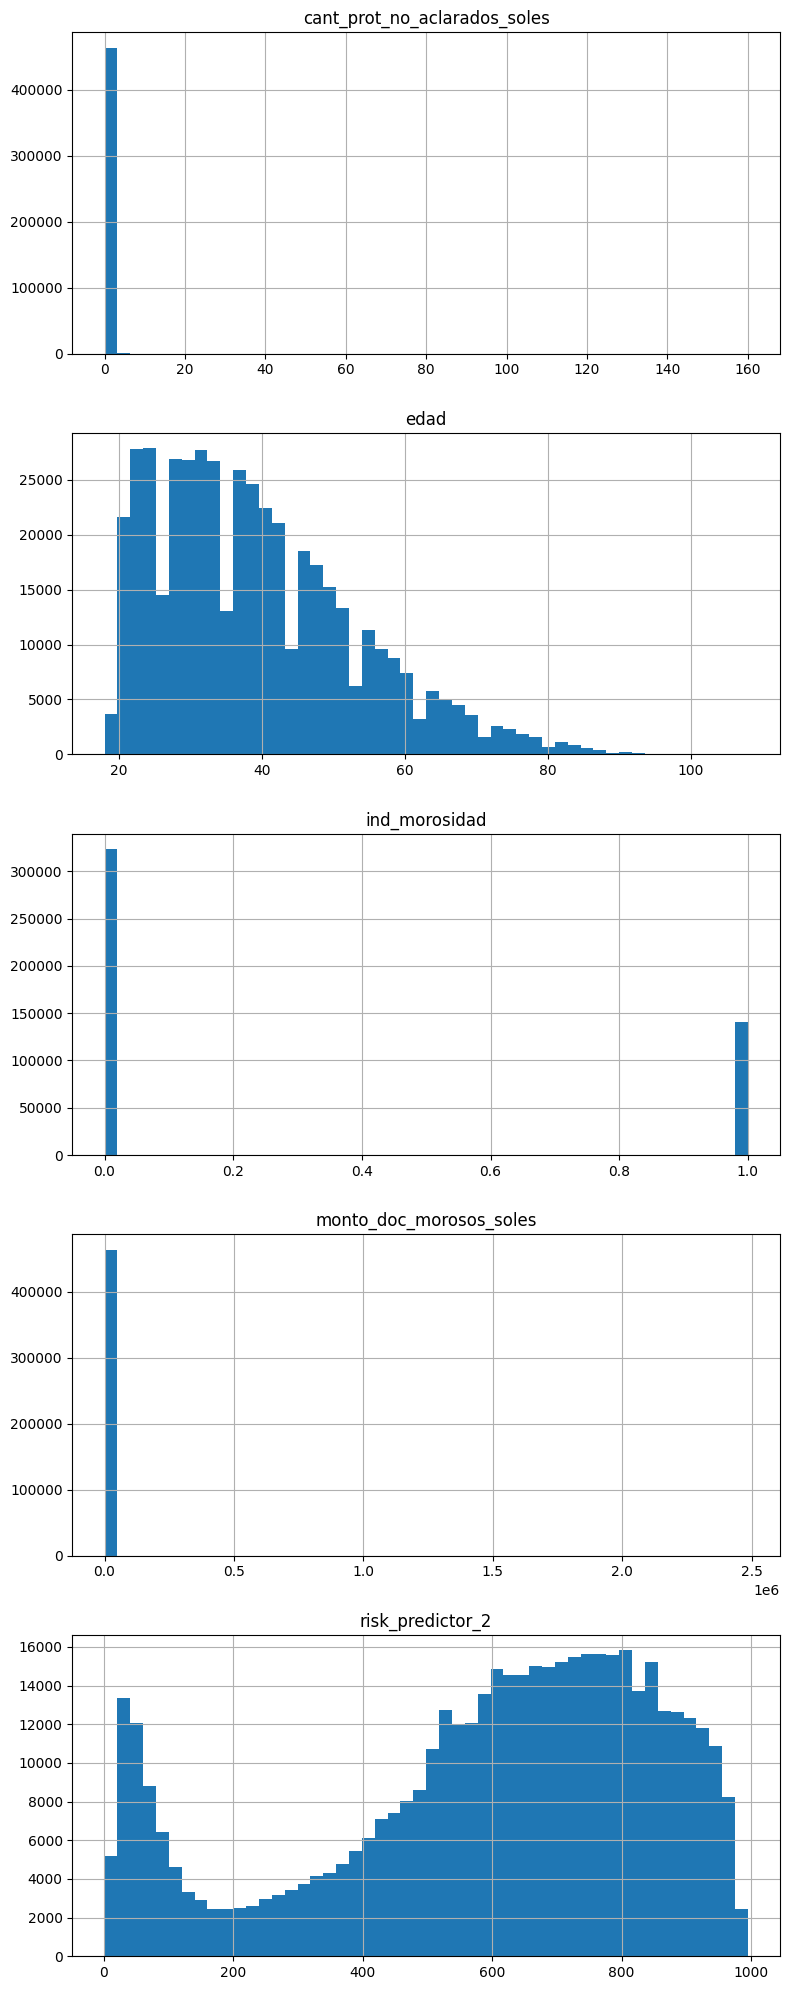

In [14]:
numericas = df_1.select_dtypes(float).columns

fig, axs = plt.subplots(nrows=len(numericas), figsize=(8, len(numericas)*4))

for i, col in enumerate(numericas):
    df_1[col].hist(ax=axs[i], bins = 50)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

poco mas hacermos con las numericas, ya que tenemos pocas de estas varaibles 

#### Categoricas

In [ ]:
df_1.select_dtypes(object)

,Id,calificacion_mes00,calificacion_mes01,calificacion_mes02,calificacion_mes03,calificacion_mes04,calificacion_mes05,canal,cantidad_doc_morosos,clase_canal,...,esta_reportado_mes01,esta_reportado_mes02,esta_reportado_mes03,esta_reportado_mes04,esta_reportado_mes05,estado_civil,ind_bancarizacion_ult10m,info_directorio_sunat,nivel_instruccion,rango_ingresos_2
0,SOL_1,No Reportado,No Reportado,No Reportado,No Reportado,No Reportado,No Reportado,AGENCIAS,1,TERCERIZADO,...,No,No,No,No,No,SOLTERO,No,No,Secundaria Completa,"[600-1,000>"
1,SOL_2,Normal,Normal,Normal,Normal,Normal,Normal,AGENCIAS,0,TERCERIZADO,...,Si,Si,Si,Si,Si,SOLTERO,Si,No,Secundaria Completa,"[1,300 - 2,000>"
2,SOL_3,Normal,Normal,Sin Calificación,Sin Calificación,Normal,Normal,AGENCIAS,0,TERCERIZADO,...,Si,Si,Si,Si,Si,SOLTERO,Si,No,Secundaria Incompleta,"[1,300 - 2,000>"
3,SOL_4,Normal,Normal,Normal,No Reportado,No Reportado,No Reportado,CALL CENTER,0,TERCERIZADO,...,Si,Si,No,No,No,SOLTERO,Si,Si,Secundaria Completa,"[600-1,000>"
5,SOL_6,No Reportado,No Reportado,No Reportado,No Reportado,No Reportado,No Reportado,CALL CENTER,0,TERCERIZADO,...,No,No,No,No,No,SOLTERO,No,No,Secundaria Incompleta,"[1,000-1,300>"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488072,SOL_488073,Normal,Normal,Normal,Normal,Normal,Normal,CENTROS DE COBRO,0,TERCERIZADO,...,Si,Si,Si,Si,Si,SOLTERO,Si,Si,Superior Completa,"[1,300-2,000>"
488073,SOL_488074,Sin Calificación,Sin Calificación,Sin Calificación,Sin Calificación,Sin Calificación,Sin Calificación,TIENDAS,0,PROPIO,...,Si,Si,Si,Si,Si,SOLTERO,Si,Si,Superior Completa,"[1,300-2,000>"
488074,SOL_488075,No Reportado,No Reportado,No Reportado,No Reportado,No Reportado,No Reportado,CALL CENTER,0,TERCERIZADO,...,No,No,No,No,No,SOLTERO,No,Si,Secundaria Completa,"[600-1,000>"
488075,SOL_488076,No Reportado,No Reportado,No Reportado,No Reportado,No Reportado,No Reportado,CALL CENTER,2,TERCERIZADO,...,No,No,No,No,No,SOLTERO,No,Si,Secundaria Completa,"[1,000-1,300>"


In [15]:
#vamos a sacar todos las variables unicas de cada columna 
x =[]
for i in df_1.select_dtypes(object).columns:
    x.append(df_1[i].iloc[:1000,].value_counts())


In [16]:
#Y de esta manera vamso a ir visualizando cuanto se repite cada una 
for i in x[0:3]:
    print(i)

Id
SOL_1       1
SOL_709     1
SOL_695     1
SOL_696     1
SOL_697     1
           ..
SOL_359     1
SOL_360     1
SOL_361     1
SOL_362     1
SOL_1052    1
Name: count, Length: 1000, dtype: int64
calificacion_mes00
No Reportado        459
Normal              346
Perdida              96
Sin Calificación     50
CPP                  31
Deficiente           10
Dudoso                8
Name: count, dtype: int64
calificacion_mes01
No Reportado        464
Normal              354
Perdida              95
Sin Calificación     51
CPP                  16
Dudoso               12
Deficiente            8
Name: count, dtype: int64


In [17]:
# Vamos a eliminar las variables redundantes para hacer mas sencillo el modelo 
df_1 = df_1.drop(["calificacion_mes01","calificacion_mes02","calificacion_mes03","calificacion_mes04","esta_reportado_mes01","esta_reportado_mes02","esta_reportado_mes03","esta_reportado_mes04"], axis=1)

In [18]:
# Ademas vamos a elimnar variables con demasiadas caracteristicas , o que sean confusas 
df_1 = df_1.drop(["cond_domicilio_sunat","nivel_instruccion"], axis= 1)

Vamos a modificar la variable de los rango de ingresos. Ya que esta puede aportar mucha informacion.

Para ello en primer lugar vamos a separarla en dos columnas y a tratarlas para convertirlas en numericas

In [19]:
df_1["rango_ingresos_2"].value_counts()

rango_ingresos_2
[600-1,000>         205441
[1,300-2,000>        49711
[1,000-1,300>        46752
[450-600>            42543
[2,000-3,500>        32134
[600 - 1,000>        24609
<450                 16677
[3,500-6,000>        14138
[6,000-10,000>        6024
[1,300 - 2,000>       5952
[1,000 - 1,300>       5365
[450 - 600>           4682
[2,000 - 3,500>       3718
>=10,000              2847
[3,500 - 6,000>       1662
< 450                 1398
[6,000 - 10,000>       676
Sin ingreso              6
Name: count, dtype: int64

In [20]:
df_2 = df_1.copy()


In [21]:
# vamos a quitar todos los simbolos que apreciamos en esta variable para poder convertirla a numerica 

df_2["rango_ingresos_2"] = df_2["rango_ingresos_2"].str.replace("[", "")
df_2["rango_ingresos_2"] = df_2["rango_ingresos_2"].str.replace(">", "")
df_2["rango_ingresos_2"] = df_2["rango_ingresos_2"].str.replace("<", "")
df_2["rango_ingresos_2"] = df_2["rango_ingresos_2"].str.replace(",", "")
df_2["rango_ingresos_2"] = df_2["rango_ingresos_2"].str.replace("=", "")

df_2[["rango_min","rango_max"]] = df_2["rango_ingresos_2"].str.split("-", expand=True)


In [22]:
# Aqui vamos a transformar en ceros las filas con "sin ingresos", tanto la columna min como la max

df_2["rango_min"] = df_2["rango_min"].apply(lambda x: 0 if x == "Sin ingreso" else x)
df_2.loc[df_2["rango_min"] == 0, "rango_max"] = 0

# transformamos la variable a numerica 
df_2[["rango_min","rango_max"]] =df_2[["rango_min","rango_max"]].astype(float)


In [23]:
#Vamos a transformar cuando es menor de 450 de la siguiente manera 

df_2.loc[df_2["rango_min"]== 450, "rango_max"] = 450
df_2.loc[df_2["rango_min"]== 450, "rango_min"] = 0

In [24]:
# vamos a modificar tambien las filas con 10 000 ya que no teienen un max, ya que es un unico valor de min y max
df_2.loc[ df_2["rango_min"]== 10000.0, "rango_max"] = 10000

In [25]:
pd.crosstab(df_2["rango_min"], df_2["rango_max"])

rango_max,0.0,450.0,1000.0,1300.0,2000.0,3500.0,6000.0,10000.0
rango_min,,,,,,,,
0.0,6,65300,0,0,0,0,0,0
600.0,0,0,230050,0,0,0,0,0
1000.0,0,0,0,52117,0,0,0,0
1300.0,0,0,0,0,55663,0,0,0
2000.0,0,0,0,0,0,35852,0,0
3500.0,0,0,0,0,0,0,15800,0
6000.0,0,0,0,0,0,0,0,6700
10000.0,0,0,0,0,0,0,0,2847


<Axes: xlabel='rango_min', ylabel='rango_max'>

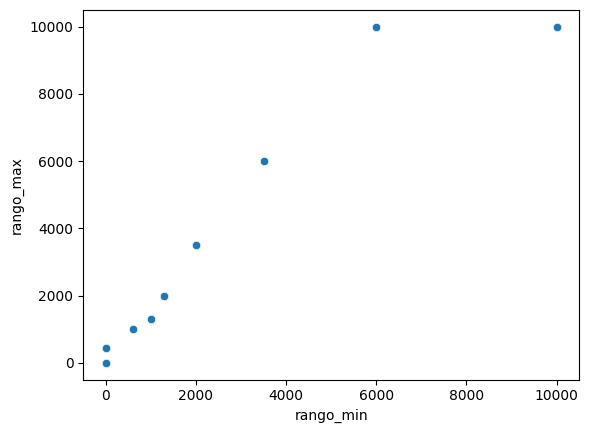

In [26]:
# visualizamos la relacion que hay entre el min y el max 

sns.scatterplot(data=  df_2 , x =  "rango_min" , y = "rango_max" )

dada la colinealidad que hay entre las dos varaibles, vamos a usar solo una , que sera la media de ambos valores 

In [27]:
df_2["rango_ingreso"] = ( df_2["rango_min"] + df_2["rango_max"] )/2
df_2 = df_2.drop(["rango_ingresos_2" , "rango_min" ,"rango_max"], axis=1)
df_2.head()

,Id,target,calificacion_mes00,calificacion_mes05,canal,cant_prot_no_aclarados_soles,cantidad_doc_morosos,clase_canal,direccion_eval,edad,esta_reportado_mes00,esta_reportado_mes05,estado_civil,ind_bancarizacion_ult10m,ind_morosidad,info_directorio_sunat,monto_doc_morosos_soles,risk_predictor_2,rango_ingreso
0,SOL_1,1,No Reportado,No Reportado,AGENCIAS,0.0,1,TERCERIZADO,regular,23.0,No,No,SOLTERO,No,1.0,No,1173.46,373.0,800.0
1,SOL_2,0,Normal,Normal,AGENCIAS,0.0,0,TERCERIZADO,normal,27.0,Si,Si,SOLTERO,Si,0.0,No,0.00,702.0,1650.0
2,SOL_3,1,Normal,Normal,AGENCIAS,0.0,0,TERCERIZADO,normal,28.0,Si,Si,SOLTERO,Si,0.0,No,0.00,728.0,1650.0
3,SOL_4,1,Normal,No Reportado,CALL CENTER,0.0,0,TERCERIZADO,normal,45.0,Si,No,SOLTERO,Si,0.0,Si,0.00,650.0,800.0
5,SOL_6,0,No Reportado,No Reportado,CALL CENTER,0.0,0,TERCERIZADO,regular,26.0,No,No,SOLTERO,No,0.0,No,0.00,510.0,1150.0


In [28]:
df_2.to_csv("df_kagle.csv")

### Descripcion de los datos segun el tarjet

In [29]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [30]:
df_3 = pd.read_csv("df_kagle.csv", index_col= 0)
df_3.head()

,Id,target,calificacion_mes00,calificacion_mes05,canal,cant_prot_no_aclarados_soles,cantidad_doc_morosos,clase_canal,direccion_eval,edad,esta_reportado_mes00,esta_reportado_mes05,estado_civil,ind_bancarizacion_ult10m,ind_morosidad,info_directorio_sunat,monto_doc_morosos_soles,risk_predictor_2,rango_ingreso
0,SOL_1,1,No Reportado,No Reportado,AGENCIAS,0.0,1,TERCERIZADO,regular,23.0,No,No,SOLTERO,No,1.0,No,1173.46,373.0,800.0
1,SOL_2,0,Normal,Normal,AGENCIAS,0.0,0,TERCERIZADO,normal,27.0,Si,Si,SOLTERO,Si,0.0,No,0.00,702.0,1650.0
2,SOL_3,1,Normal,Normal,AGENCIAS,0.0,0,TERCERIZADO,normal,28.0,Si,Si,SOLTERO,Si,0.0,No,0.00,728.0,1650.0
3,SOL_4,1,Normal,No Reportado,CALL CENTER,0.0,0,TERCERIZADO,normal,45.0,Si,No,SOLTERO,Si,0.0,Si,0.00,650.0,800.0
5,SOL_6,0,No Reportado,No Reportado,CALL CENTER,0.0,0,TERCERIZADO,regular,26.0,No,No,SOLTERO,No,0.0,No,0.00,510.0,1150.0


In [31]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464335 entries, 0 to 488076
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Id                            464335 non-null  object 
 1   target                        464335 non-null  int64  
 2   calificacion_mes00            464335 non-null  object 
 3   calificacion_mes05            464335 non-null  object 
 4   canal                         464335 non-null  object 
 5   cant_prot_no_aclarados_soles  464335 non-null  float64
 6   cantidad_doc_morosos          464335 non-null  int64  
 7   clase_canal                   464335 non-null  object 
 8   direccion_eval                464335 non-null  object 
 9   edad                          464335 non-null  float64
 10  esta_reportado_mes00          464335 non-null  object 
 11  esta_reportado_mes05          464335 non-null  object 
 12  estado_civil                  464335 non-null  ob

In [32]:

objetos = df_3.select_dtypes(object)
x = []
for i in objetos:
    x.append(pd.crosstab( df_3["target"], df_3[i]))


In [33]:
#quitamos el primero que es el ID 
del x[0]

x

[calificacion_mes00   CPP  Deficiente  Dudoso  No Reportado  Normal  Perdida  \
 target                                                                        
 0                   7244        3082    2722        138211  118969    22033   
 1                   4584        2519    2624         78047   38849    24755   
 
 calificacion_mes00  Sin Calificación  
 target                                
 0                              16545  
 1                               4151  ,
 calificacion_mes05   CPP  Deficiente  Dudoso  No Reportado  Normal  Perdida  \
 target                                                                        
 0                   7265        3187    2834        147099  111321    21281   
 1                   4082        2277    2458         83686   36187    22716   
 
 calificacion_mes05  Sin Calificación  
 target                                
 0                              15819  
 1                               4123  ,
 canal   AGENCIAS  AGENTES  CALL C

In [34]:
import scipy.stats as stats

for i in x:
    estadistico_chi2, p_valor, grados_libertad, _ = stats.chi2_contingency(i)
    print(i.columns)
    # Imprimir los resultados
    print(f"Valor p: {p_valor}")


Index(['CPP', 'Deficiente', 'Dudoso', 'No Reportado', 'Normal', 'Perdida',
       'Sin Calificación'],
      dtype='object', name='calificacion_mes00')
Valor p: 0.0
Index(['CPP', 'Deficiente', 'Dudoso', 'No Reportado', 'Normal', 'Perdida',
       'Sin Calificación'],
      dtype='object', name='calificacion_mes05')
Valor p: 0.0
Index(['AGENCIAS', 'AGENTES', 'CALL CENTER', 'CENTROS DE COBRO',
       'FUERZA DE VENTA', 'GRANDES SUPERFICIES', 'ONLINE', 'OTROS', 'TIENDAS'],
      dtype='object', name='canal')
Valor p: 0.0
Index(['PROPIO', 'TERCERIZADO'], dtype='object', name='clase_canal')
Valor p: 0.0
Index(['buena', 'mala', 'normal', 'regular'], dtype='object', name='direccion_eval')
Valor p: 0.0
Index(['No', 'Si'], dtype='object', name='esta_reportado_mes00')
Valor p: 5.506591981807371e-268
Index(['No', 'Si'], dtype='object', name='esta_reportado_mes05')
Valor p: 0.0
Index(['CASADO', 'DIVORCIADO', 'SEPARADO', 'SOLTERO', 'VIUDO'], dtype='object', name='estado_civil')
Valor p: 0.0
Index([

Vemos que todos las variables categoricas comparadas con el tarjet presentan valores bajos del p valor. Esto quiere decir que hay una relacion entre las variables y el tarjet, o sea que el grupo 0 o 1 afecta a los valores de las otras variables 

Por esto , no vamos a quitar ninguna varaible categorica para el modelo 

<Axes: xlabel='risk_predictor_2', ylabel='rango_ingreso'>

C:\Users\GermanBo\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\GermanBo\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


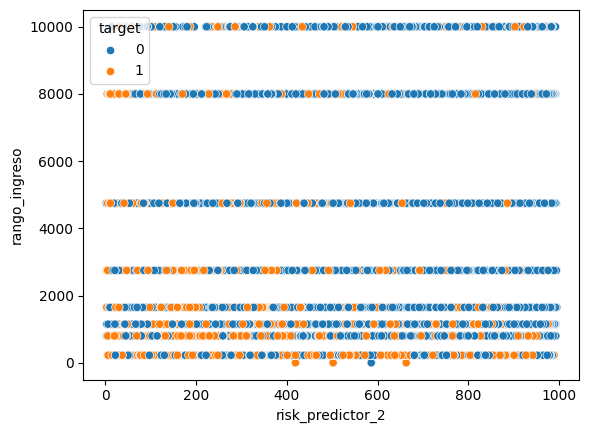

In [35]:
sns.scatterplot( data = df_3 , x = "risk_predictor_2" , y =  "rango_ingreso" , hue = "target" )

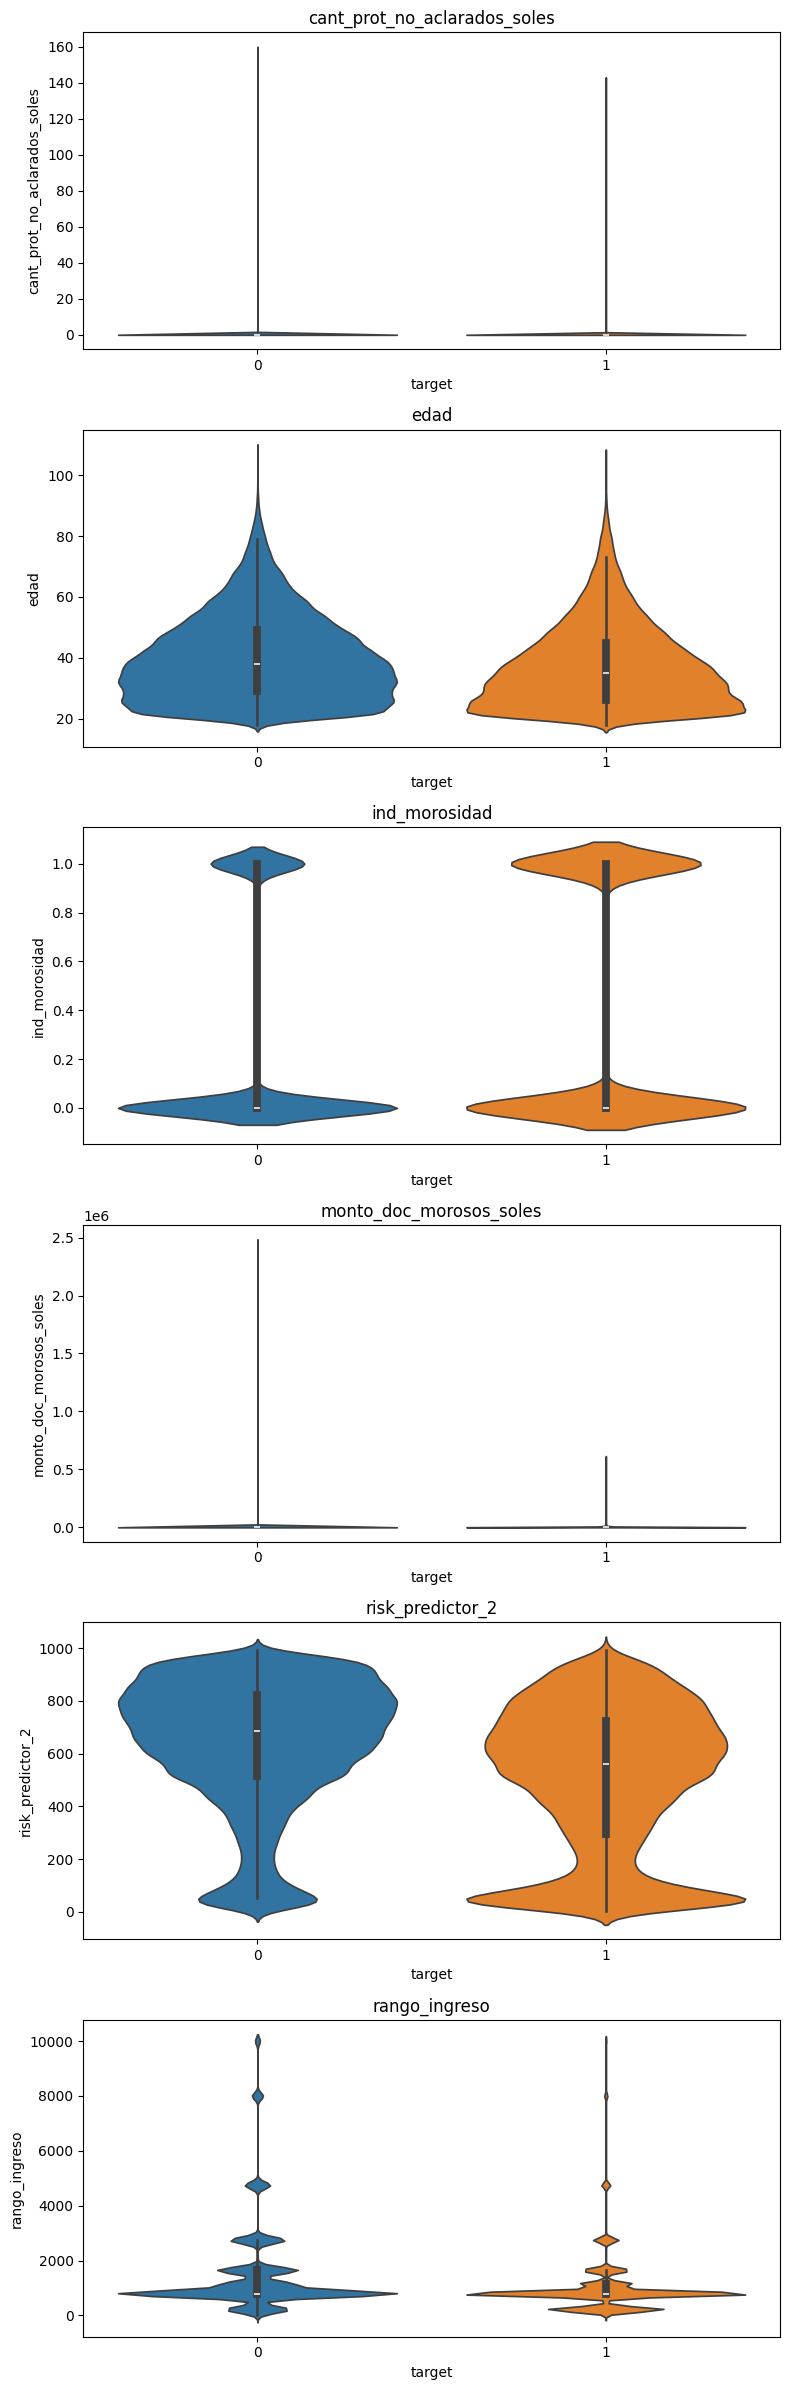

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

numericas = df_3.select_dtypes(float).columns

fig, axs = plt.subplots(nrows=len(numericas), figsize=(8, len(numericas)*4))

for i, col in enumerate(numericas):
    sns.violinplot(x="target", y=col, data=df_3, ax=axs[i], hue='target', legend=False)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

### Preparacion variables al modelo

In [37]:
df_4 = df_3.copy()
df_4.head()

,Id,target,calificacion_mes00,calificacion_mes05,canal,cant_prot_no_aclarados_soles,cantidad_doc_morosos,clase_canal,direccion_eval,edad,esta_reportado_mes00,esta_reportado_mes05,estado_civil,ind_bancarizacion_ult10m,ind_morosidad,info_directorio_sunat,monto_doc_morosos_soles,risk_predictor_2,rango_ingreso
0,SOL_1,1,No Reportado,No Reportado,AGENCIAS,0.0,1,TERCERIZADO,regular,23.0,No,No,SOLTERO,No,1.0,No,1173.46,373.0,800.0
1,SOL_2,0,Normal,Normal,AGENCIAS,0.0,0,TERCERIZADO,normal,27.0,Si,Si,SOLTERO,Si,0.0,No,0.00,702.0,1650.0
2,SOL_3,1,Normal,Normal,AGENCIAS,0.0,0,TERCERIZADO,normal,28.0,Si,Si,SOLTERO,Si,0.0,No,0.00,728.0,1650.0
3,SOL_4,1,Normal,No Reportado,CALL CENTER,0.0,0,TERCERIZADO,normal,45.0,Si,No,SOLTERO,Si,0.0,Si,0.00,650.0,800.0
5,SOL_6,0,No Reportado,No Reportado,CALL CENTER,0.0,0,TERCERIZADO,regular,26.0,No,No,SOLTERO,No,0.0,No,0.00,510.0,1150.0


In [38]:
# Primeros vamos a estandarizar los datos 

from sklearn.preprocessing import StandardScaler


In [39]:
df_4 = df_4.drop("Id", axis=1)


In [40]:
x = df_4.select_dtypes(float).columns.to_list()
x.remove("ind_morosidad")
x

['cant_prot_no_aclarados_soles',
 'edad',
 'monto_doc_morosos_soles',
 'risk_predictor_2',
 'rango_ingreso']

<Axes: >

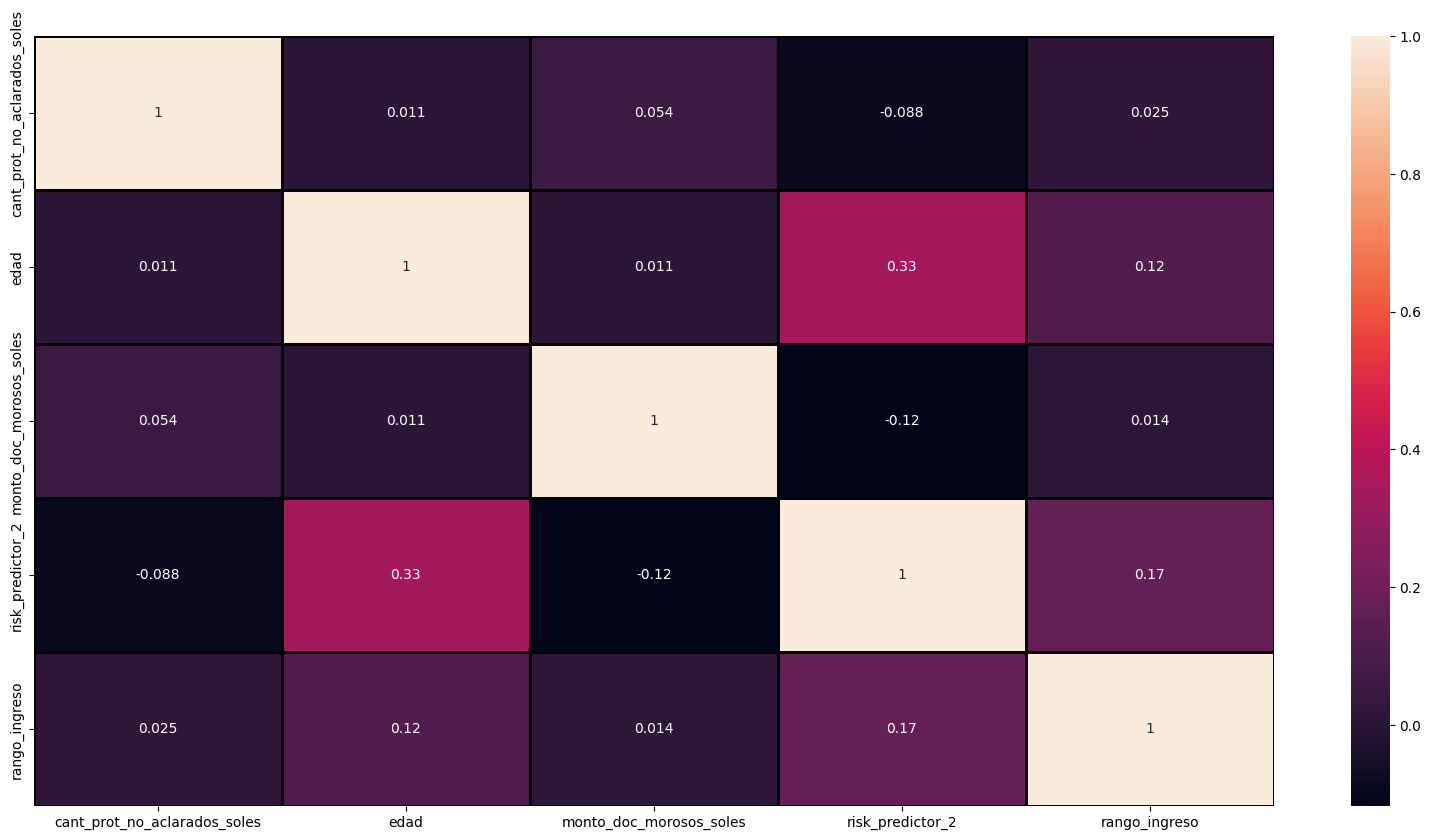

In [41]:

escalado = StandardScaler()

df_4[x] = escalado.fit_transform(df_4[x])

matriz = df_4[x].corr()

plt.figure(figsize=(20,10))
sns.heatmap(matriz,annot=True,linecolor='black',linewidths=2)

In [42]:
# One Hot Encoder 

from sklearn.preprocessing import OneHotEncoder

In [43]:
x = df_4.select_dtypes(object).columns.to_list() 
x

['calificacion_mes00',
 'calificacion_mes05',
 'canal',
 'clase_canal',
 'direccion_eval',
 'esta_reportado_mes00',
 'esta_reportado_mes05',
 'estado_civil',
 'ind_bancarizacion_ult10m',
 'info_directorio_sunat']

In [44]:
encoder = OneHotEncoder()

array = encoder.fit_transform(df_4[x])
onehot = pd.DataFrame(array.toarray()).reset_index()
onehot.head()


,index,0,1,2,3,4,5,6,7,8,...,32,33,34,35,36,37,38,39,40,41
0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [45]:
df_4  = df_4.drop(x, axis=1 ).reset_index()
df_4 = pd.concat([df_4,onehot], axis = 1)
df_4.head()

,index,target,cant_prot_no_aclarados_soles,cantidad_doc_morosos,edad,ind_morosidad,monto_doc_morosos_soles,risk_predictor_2,rango_ingreso,index,...,32,33,34,35,36,37,38,39,40,41
0,0,1,-0.084734,1,-1.158561,1.0,0.111118,-0.819159,-0.359048,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,0,-0.084734,0,-0.871381,0.0,-0.079972,0.420211,0.244604,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,2,1,-0.084734,0,-0.799586,0.0,-0.079972,0.518155,0.244604,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,3,1,-0.084734,0,0.420928,0.0,-0.079972,0.224323,-0.359048,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5,0,-0.084734,0,-0.943176,0.0,-0.079972,-0.303069,-0.110486,4,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


### Generacion de los modelos 

In [46]:
df_4.columns = df_4.columns.astype(str)
df_4.head()


,index,target,cant_prot_no_aclarados_soles,cantidad_doc_morosos,edad,ind_morosidad,monto_doc_morosos_soles,risk_predictor_2,rango_ingreso,index,...,32,33,34,35,36,37,38,39,40,41
0,0,1,-0.084734,1,-1.158561,1.0,0.111118,-0.819159,-0.359048,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,0,-0.084734,0,-0.871381,0.0,-0.079972,0.420211,0.244604,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,2,1,-0.084734,0,-0.799586,0.0,-0.079972,0.518155,0.244604,2,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,3,1,-0.084734,0,0.420928,0.0,-0.079972,0.224323,-0.359048,3,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5,0,-0.084734,0,-0.943176,0.0,-0.079972,-0.303069,-0.110486,4,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [47]:
X_train = df_4.drop(["target", "index"],axis=1)
y_train = df_4["target"]

# En este caso no hacemos la sepracion, ya que el mismo problema nos da separados los dos df 

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
# Ajuste del modelo de regresión logística
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [51]:
y_train_pred = logistic_model.predict(X_train)


<Axes: >

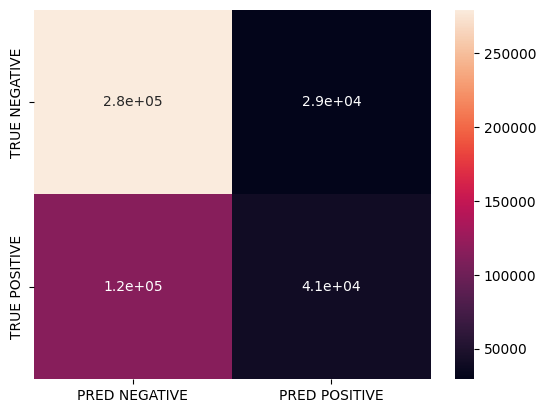

In [52]:
# Matriz de confusion 
from sklearn import metrics

matriz_confusion = metrics.confusion_matrix(y_true = y_train, y_pred=y_train_pred)
tn, fp, fn, tp = matriz_confusion.ravel()
tn, fp, fn, tp

mc_df = pd.DataFrame(matriz_confusion,index=["TRUE NEGATIVE", "TRUE POSITIVE"], columns = ["PRED NEGATIVE","PRED POSITIVE"])

sns.heatmap(mc_df, annot =True)

In [53]:
## Accuracy: Tasa de acierto 
print(metrics.accuracy_score(y_train,y_train_pred))

## Recall (sensibilidad): Tasa de acierto EN positivos TPR
print(metrics.recall_score(y_train,y_train_pred) )


## Precision: Tasa de acierto DE positivos; PPR
print(metrics.precision_score(y_train,y_train_pred) ) 

0.6893492844605726


0.2605301905110944
0.5808736040827444


Tenemos un modelo desbalanceado , ya que tiene una baja sensibilidad al detectar los postivos. Pero dado que tiene un score del 68% , vamos a usarlo para la prediccion del conjunto de datos test 

# Prediccion del conjunto test

In [54]:
df_test = pd.read_csv("Test.csv", encoding='latin1')


### Na y outlayer

Viendo que la mayoria de los Na se dan en unas determinadas columnas, vamos a eliminar esas columnas directamente, para posteriormente eliminar las filas con Na de las otras variables que presentan menos. El punto de corte lo vamos a tener con la variable "edad" 

In [62]:
df_1 = df_test.drop(col_na, axis=1) # las columnas col_na estan seleccionadas al inicio del notebook
df_1 = df_1.dropna()
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199282 entries, 0 to 209174
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Id                            199282 non-null  object 
 1   calificacion_mes00            199282 non-null  object 
 2   calificacion_mes01            199282 non-null  object 
 3   calificacion_mes02            199282 non-null  object 
 4   calificacion_mes03            199282 non-null  object 
 5   calificacion_mes04            199282 non-null  object 
 6   calificacion_mes05            199282 non-null  object 
 7   canal                         199282 non-null  object 
 8   cant_prot_no_aclarados_soles  199282 non-null  float64
 9   cantidad_doc_morosos          199282 non-null  object 
 10  clase_canal                   199282 non-null  object 
 11  cond_domicilio_sunat          199282 non-null  object 
 12  direccion_eval                199282 non-null  ob

### Tratamiento de las variables

#### Categoricas

In [65]:
# Vamos a eliminar las variables redundantes para hacer mas sencillo el modelo 
df_1 = df_1.drop(["calificacion_mes01","calificacion_mes02","calificacion_mes03","calificacion_mes04","esta_reportado_mes01","esta_reportado_mes02","esta_reportado_mes03","esta_reportado_mes04"], axis=1)

In [66]:
# Ademas vamos a elimnar variables con demasiadas caracteristicas , o que sean confusas 
df_1 = df_1.drop(["cond_domicilio_sunat","nivel_instruccion"], axis= 1)

In [68]:
df_2 = df_1.copy()


In [69]:
# vamos a quitar todos los simbolos que apreciamos en esta variable para poder convertirla a numerica 

df_2["rango_ingresos_2"] = df_2["rango_ingresos_2"].str.replace("[", "")
df_2["rango_ingresos_2"] = df_2["rango_ingresos_2"].str.replace(">", "")
df_2["rango_ingresos_2"] = df_2["rango_ingresos_2"].str.replace("<", "")
df_2["rango_ingresos_2"] = df_2["rango_ingresos_2"].str.replace(",", "")
df_2["rango_ingresos_2"] = df_2["rango_ingresos_2"].str.replace("=", "")

df_2[["rango_min","rango_max"]] = df_2["rango_ingresos_2"].str.split("-", expand=True)


In [70]:
# Aqui vamos a transformar en ceros las filas con "sin ingresos", tanto la columna min como la max

df_2["rango_min"] = df_2["rango_min"].apply(lambda x: 0 if x == "Sin ingreso" else x)
df_2.loc[df_2["rango_min"] == 0, "rango_max"] = 0

# transformamos la variable a numerica 
df_2[["rango_min","rango_max"]] =df_2[["rango_min","rango_max"]].astype(float)


In [71]:
#Vamos a transformar cuando es menor de 450 de la siguiente manera 

df_2.loc[df_2["rango_min"]== 450, "rango_max"] = 450
df_2.loc[df_2["rango_min"]== 450, "rango_min"] = 0

In [72]:
# vamos a modificar tambien las filas con 10 000 ya que no teienen un max, ya que es un unico valor de min y max
df_2.loc[ df_2["rango_min"]== 10000.0, "rango_max"] = 10000

In [73]:
pd.crosstab(df_2["rango_min"], df_2["rango_max"])

rango_max,0.0,450.0,1000.0,1300.0,2000.0,3500.0,6000.0,10000.0
rango_min,,,,,,,,
0.0,3,27937,0,0,0,0,0,0
600.0,0,0,99131,0,0,0,0,0
1000.0,0,0,0,22466,0,0,0,0
1300.0,0,0,0,0,23823,0,0,0
2000.0,0,0,0,0,0,15062,0,0
3500.0,0,0,0,0,0,0,6723,0
6000.0,0,0,0,0,0,0,0,2891
10000.0,0,0,0,0,0,0,0,1246


In [74]:
df_2["rango_ingreso"] = ( df_2["rango_min"] + df_2["rango_max"] )/2
df_2 = df_2.drop(["rango_ingresos_2" , "rango_min" ,"rango_max"], axis=1)
df_2.head()

,Id,calificacion_mes00,calificacion_mes05,canal,cant_prot_no_aclarados_soles,cantidad_doc_morosos,clase_canal,direccion_eval,edad,esta_reportado_mes00,esta_reportado_mes05,estado_civil,ind_bancarizacion_ult10m,ind_morosidad,info_directorio_sunat,monto_doc_morosos_soles,risk_predictor_2,rango_ingreso
0,SOL_488078,No Reportado,No Reportado,AGENCIAS,0.0,0,TERCERIZADO,mala,21.0,No,No,SOLTERO,No,0.0,No,0.00,718.0,225.0
1,SOL_488079,Normal,Normal,TIENDAS,0.0,0,PROPIO,mala,36.0,Si,Si,SOLTERO,Si,0.0,Si,0.00,537.0,2750.0
2,SOL_488080,No Reportado,No Reportado,AGENCIAS,0.0,1,TERCERIZADO,normal,34.0,No,No,SOLTERO,No,1.0,Si,125.39,449.0,225.0
3,SOL_488081,No Reportado,No Reportado,TIENDAS,0.0,0,PROPIO,normal,39.0,No,No,SOLTERO,No,0.0,No,0.00,780.0,800.0
4,SOL_488082,Normal,Normal,FUERZA DE VENTA,0.0,0,TERCERIZADO,buena,32.0,Si,Si,SOLTERO,Si,0.0,Si,0.00,767.0,4750.0


In [75]:
df_2.to_csv("df_kagle_test.csv")

### Preparacion variables al modelo

In [76]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [102]:
df_4 = pd.read_csv("df_kagle_test.csv", index_col= 0)
df_4.head()

,Id,calificacion_mes00,calificacion_mes05,canal,cant_prot_no_aclarados_soles,cantidad_doc_morosos,clase_canal,direccion_eval,edad,esta_reportado_mes00,esta_reportado_mes05,estado_civil,ind_bancarizacion_ult10m,ind_morosidad,info_directorio_sunat,monto_doc_morosos_soles,risk_predictor_2,rango_ingreso
0,SOL_488078,No Reportado,No Reportado,AGENCIAS,0.0,0,TERCERIZADO,mala,21.0,No,No,SOLTERO,No,0.0,No,0.00,718.0,225.0
1,SOL_488079,Normal,Normal,TIENDAS,0.0,0,PROPIO,mala,36.0,Si,Si,SOLTERO,Si,0.0,Si,0.00,537.0,2750.0
2,SOL_488080,No Reportado,No Reportado,AGENCIAS,0.0,1,TERCERIZADO,normal,34.0,No,No,SOLTERO,No,1.0,Si,125.39,449.0,225.0
3,SOL_488081,No Reportado,No Reportado,TIENDAS,0.0,0,PROPIO,normal,39.0,No,No,SOLTERO,No,0.0,No,0.00,780.0,800.0
4,SOL_488082,Normal,Normal,FUERZA DE VENTA,0.0,0,TERCERIZADO,buena,32.0,Si,Si,SOLTERO,Si,0.0,Si,0.00,767.0,4750.0


In [103]:
df_4 = df_4.drop("Id", axis=1)


In [104]:
x = df_4.select_dtypes(float).columns.to_list()
x.remove("ind_morosidad")
x

['cant_prot_no_aclarados_soles',
 'edad',
 'monto_doc_morosos_soles',
 'risk_predictor_2',
 'rango_ingreso']

In [105]:
### Escalado 
# Escalamos los datos con el estandarscaler ya ajustado de antes 

df_4[x] = escalado.transform(df_4[x])


In [106]:
x = df_4.select_dtypes(object).columns.to_list() 
x

['calificacion_mes00',
 'calificacion_mes05',
 'canal',
 'clase_canal',
 'direccion_eval',
 'esta_reportado_mes00',
 'esta_reportado_mes05',
 'estado_civil',
 'ind_bancarizacion_ult10m',
 'info_directorio_sunat']

In [107]:
# One Hot Encoder 
# Codificamos las variables  con el OneHotEncoder ya ajustado de antes 

array = encoder.transform(df_4[x])
onehot = pd.DataFrame(array.toarray()).reset_index()
onehot.head()


,index,0,1,2,3,4,5,6,7,8,...,32,33,34,35,36,37,38,39,40,41
0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [108]:
df_4  = df_4.drop(x, axis=1 ).reset_index()
df_4 = pd.concat([df_4,onehot], axis = 1)
df_4.head()

,index,cant_prot_no_aclarados_soles,cantidad_doc_morosos,edad,ind_morosidad,monto_doc_morosos_soles,risk_predictor_2,rango_ingreso,index,0,...,32,33,34,35,36,37,38,39,40,41
0,0,-0.084734,0,-1.302151,0.0,-0.079972,0.480484,-0.767401,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,-0.084734,0,-0.225227,0.0,-0.079972,-0.201358,1.025801,1,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,2,-0.084734,1,-0.368817,1.0,-0.059553,-0.532861,-0.767401,2,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,3,-0.084734,0,-0.009842,0.0,-0.079972,0.714043,-0.359048,3,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,4,-0.084734,0,-0.512407,0.0,-0.079972,0.665071,2.446158,4,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Predicción

In [109]:
df_4.columns = df_4.columns.astype(str)
df_4 = df_4.drop(["index"],axis=1)


In [110]:
y_pred_test = logistic_model.predict(df_4)

In [111]:
y_prob = logistic_model.predict_proba(df_4)[:, 1]  # Probabilidad de la clase positiva (Sí)

In [120]:
y_prob = pd.DataFrame(y_prob)
y_prob

,0
0,0.460915
1,0.187686
2,0.492442
3,0.206110
4,0.122765
...,...
199277,0.115109
199278,0.446650
199279,0.051083
199280,0.176086


In [122]:
id = pd.read_csv("df_kagle_test.csv", index_col= 0)
id = id["Id"].reset_index()

In [148]:
final = pd.concat( [id , y_prob ], axis =1)
final

,index,Id,0
0,0,SOL_488078,0.460915
1,1,SOL_488079,0.187686
2,2,SOL_488080,0.492442
3,3,SOL_488081,0.206110
4,4,SOL_488082,0.122765
...,...,...,...
199277,209169,SOL_697247,0.115109
199278,209170,SOL_697248,0.446650
199279,209171,SOL_697249,0.051083
199280,209173,SOL_697251,0.176086


In [149]:
final = final.drop(["index"], axis=1).reset_index(drop=True)

In [150]:
final

,Id,0
0,SOL_488078,0.460915
1,SOL_488079,0.187686
2,SOL_488080,0.492442
3,SOL_488081,0.206110
4,SOL_488082,0.122765
...,...,...
199277,SOL_697247,0.115109
199278,SOL_697248,0.446650
199279,SOL_697249,0.051083
199280,SOL_697251,0.176086


In [131]:
final.columns = ["Id","Predicted"]

In [151]:
final.to_csv("final_gbosch.csv", index=False)

En conclusión,, se ha logrado desarrollar un modelo predictivo capaz de evaluar el riesgo de impago de los solicitantes de préstamos y créditos de consumo con una precisión aceptable. Este modelo ofrece a la empresa  una herramienta efectiva para identificar potenciales riesgos financieros y tomar decisiones más informadas en su proceso de financiación.